<a href="https://colab.research.google.com/github/suhyeon03/DeepLearning/blob/main/ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 학습

데이터에서 학습한다!


* 신경망의 특징은 데이터를 보고, 학습 할 수 있다는 점
* 학습이란, 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
* 학습의 목표는 손실 함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것

데이터 주도학습

* 기계학습은 데이터에서 답을 찾고, 데이터에서 패턴을 발견하고 데이터로 이야기를 만드는 것
* 따라서 기계학습의 중심에는 데이터가 존재한다고 할 수 있음
* 기계학습에서는 사람의 개입을 최소화하면서 수집한 데이터로 패턴을 찾으려 시도
* MNIST 모델에서 숫자를 인식하는 알고리즘이 동작하기 위해서,
  * 이미지에서 특징 (Feature)을 추출하여 그 특징의 패턴을 기계학습 기술로 학습
  * 특징은 입력 데이터에서 본질적인 데이터를 정확히 추출할 수 있도록 설계된 변환기
이미지의 특징은 일반적으로 ‘벡터’로 변환하여 학습
* 기계학습에서는 모아진 데이터로부터 규칙을 찾아내는 역할을 기계가 한다고 할 수 있음
* 사람이 직접 설계하는 것에 비해서 부담은 적지만, 이미지를 벡터로 변환하는 등의 과정은 사람이 해야 함
* 문제에 적합한 특징을 설계하지 (전처리) 못한다면, 좋은 결과를 획득하기도 어렵다고 할 수 있음
* 입력부터 출력까지 사람의 개입 없이 동작하여 종단간 기계학습 (end-to-end machine learning)이라고도 함


훈련 데이터와 시험 데이터


* 기계학습 문제는 훈련 데이터 (Training data)와 시험 데이터 (Test data)로 나눠 학습과 실험을 수행
* 훈련 데이터를 통해서 학습하면서 최적의 매개변수를 찾음
* 그 후에 시험 데이터를 사용하여 앞서 훈련한 모델의 성과를 평가
* 결국 모델링의 궁극적인 목적은 범용적으로 사용할 수 있는 일반화된 모델이므로, 훈련 데이터와 시험 데이터로 구분
* 이를 위해서 한번도 보지 못했던 훈련에 포함되지 않은 데이터로 성능을 측정
한 데이터셋에만 지나치게 최적화 된 상태를 오버피팅 (Overfitting)이라고 함

# 손실 함수

* 신경망 학습에서는 현재의 상태를 하나의 지표로 표현
* 그 지표를 가장 좋게 만들어주는 가중치 매개변수 값을 찾는 것이 목적
* 신경망 학습에서 사용하는 지표는 손실 함수 (Loss function)라고 정의
일반적으로 오차제곱합과 교차 엔트로피 오차를 사용
  * 손실 함수는 신경망의 성능의 나쁨을 나타내는 지표
  * 즉, 현재 신경망이 훈련 데이터를 얼마나 잘 처리하지 못하는지의 성능을 담고 있음
따라서 손실 함수의 값이 클수록 좋지 않는 성능을 갖고 있다고 할 수 있음

오차제곱합 (Sum of Square for Error, SSE)


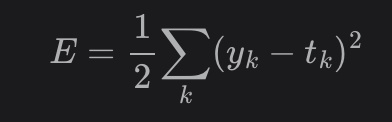

* 가장 많이 쓰이는 손실 함수는 오차제곱합이고, 수식은 위와 같음
  * yk는 신경망의 출력 (신경망이 출력한 값),
  * tk 는 정답 레이블,
  * k는 데이터의 차원 수를 나타냄
* 즉, 오차제곱합은 각 원소의 출력과 정답 레이블의 차를 제곱한 후에 그 총합을 구하는 것
* 파이썬 코드로 오차제곱합을 구현하면, 아래와 같음을 알 수 있음

  * MNIST에서 정답이 ‘2’라고 했을 때, 모델의 출력 결과가 맞았을 때와 틀렸을 때의 손실함수 값 확인
  * 출력 결과가 맞을 때, 손실 함수 값이 0.0975로 작게 나오는 것을 확인할 수 있음
  * 반면, 출력 결과가 틀렸을 때, 손실 함수 값이 0.5975로 크게 나오는 것을 확인할 수 있음
  * 즉, 손실 함수의 값이 작을수록 정답에 수렴한다고 할 수 있음

In [1]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [2]:
import numpy as np

# 정답은 '2'
t = [0,0,1,0,0,0,0,0,0,0]

# 예1 : '2'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

# 예1 : '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))


0.09750000000000003
0.5975


교차 엔트로피 오차 (Cross Entropy Error, CEE)


* 위 수식은 교차 엔트로피 오차의 수식
log는 밑이 e인 자연로그,
yk는 신경망의 출력,
tk는 정답 레이블이면서 정답 인덱스만 1 (원-핫 인코딩)
* 따라서 실질적으로 정답일 때 추정의 자연로그를 계산하는 식 (다른 경우에는 모두 0이기 때문)
* 즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 결정
파이썬 코드로 교차 엔트로피 오차를 구현하면, 아래와 같음을 알 수 있음


  * MNIST에서 정답이 ‘2’라고 했을 때, 모델의 출력 결과가 맞았을 때와 틀렸을 때의 손실함수 값 확인
  * 출력 결과가 맞을 때, 손실 함수 값이 0.5108로 작게 나오는 것을 확인할 수 있음
  * 반면, 출력 결과가 틀렸을 때, 손실 함수 값이 2.3025로 크게 나오는 것을 확인할 수 있음
  * 즉, 위의 오차제곱합과 동일하게 손실 함수의 값이 작을수록 정답에 수렴한다고 할 수 있음

-log는
‘정답 확률이 1이면 벌점 0,
0으로 갈수록 벌점이 무한히 커지는’
강하게 비대칭적인 곡선이다.

그래서 교차 엔트로피는

확신 없는 틀림은 참고

확신한 틀림은 강하게 수정

In [3]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [4]:
t = [0,0,1,0,0,0,0,0,0,0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


미니배치 학습


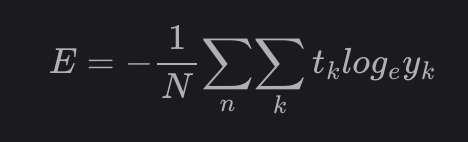

* 위 수식은 훈련 데이터 모두에 대한 손실 함수 값을 구하는 수식
* 앞선 수식과 비슷하고, 데이터 하나에 대한 손실 함수를 단순히 N개의 데이터로 확장한 것
* 마지막에는 N으로 나눠서 정규화 (평균 손실 함수의 역할)
* 하지만 현실적으로 빅데이터 안에서 이 모든 데이터를 대상으로 값을 계산하는 것은 비효율적
* 따라서 데이터 일부를 추려 전체의 근사치로 이용하는 미니배치 (Mini-batch) 방법을 사용 (일부만 골라 학습)
* 아래 코드는 MNIST 데이터셋에서 np.random.choice 함수를 통해 미니배치로 계산하는 과정을 소개

In [5]:
# 데이터가 N개라면 t는 n번째 데이터의 k번째 값을 의미한다.
# 수식이 복잡해보이지만 데이터 하나에 대한 손실 함수를 단순히 N개의 데이터로 확장했을 뿐이다.
# 다만 마지막에 N으로 나누어 정규화하고 있다. -> N으로 나눔으로써 '평균 손실 함수'를 구하는 것이다.
# 이렇게 평균을 구해 사용하면 훈련 데이터 개수와 관계없이 언제든 통일된 지표를 얻을 수 있디.

# 그러나 수많은 데이터를 대상으로 하면 시간이 걸린다. 데이터 일부를 추려 전체의 '근사치'로 이용한다.
# 훈련데이터로부터 일부만 골라 학습을 수행한다. 이 일부를 미니배치라고 한다.

In [6]:
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape(-1, 784)
x_test  = x_test.reshape(-1, 784)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [7]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [8]:
np.random.choice(60000, 10)  # 지정한 범위의 수중에서 무작위로 원하는 개수만큼 꺼낼 수 있다.

array([36555, 11145, 51457, 20266, 55304, 57651,  4401, 36435,  1560,
       38850])

교차 엔트로피 오차 구현

In [9]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [10]:
# 정답 레이블이 원-핫 인코딩이 아니라 '2', '7' 등의 숫자 레이블로 주어졌을때의 교차 엔트로피 오차
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


# batch_size는 0부터 batch_size - 1 까지 배열을 생성한다. 즉, batch_size가 5이면 np.arange는 [0,1,2,3,4]라는 넘파이 배열을 생성한다.
# t에는 레이블이 [2,7,0,9,4]와 같이 저장되어 있으므로 y[np.arange(batch_size),t]는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출한다.
# y[0,2], y[1,7], y[2,0], y[3,9], y[4,4]이런 식으로 생성

* 배치 데이터를 지원하는 교차 엔트로피 오차 구현
* y는 신경망의 출력, t는 정답 레이블
* 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있음

왜 손실 함수를 설정하는가

* 모델의 궁극적인 목적은 높은 정확도를 끌어내는 매개변수 값을 찾아내는 것
* 신경망 학습에서는 최적의 매개변수를 탐색할 때 손실 함수의 값을 가능한 작게 하는 매개변수 값을 찾음
* 이때 매개변수의 미분 (기울기)을 계산하여, 그 값을 단서로 값을 서서히 갱신하는 과정을 반복
* 가중치 매개변수의 손실 함수 미분이라는 것:

  * 가중치 매개변수 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하는지에 대한 것
  * 미분 값이 음수면, 그 가중치 매개변수를 양의 방향으로 변화시켜서 손실 함수의 값을 줄일 수 있음
  * 반대로 미분 값이 양수면, 가중치 매개변수를 음의 방향으로 변화시켜서 손실 함수 값을 줄일 수 있음
  * 하지만 미분 값이 0이면, 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수 값은 변화하지 않음
  * 따라서 매개변수 갱신은 중단

* 정확도를 지표로 삼게 되면, 결과값이 연속적으로 변화하지 못하고, 불연속적으로 띄엄띄엄한 값으로 변화
* 한편, 손실 함수를 지표로 삼으면, 매개변수 값이 변할 때마다 그에 반응하여 손실 함수도 연속적으로 값이 변화
* 따라서 활성화 함수로 계단 함수를 사용하지 않는 이유 역시, 미분값이 불연속적으로 계산되기 때문임
* 시그모이드 함수 같은 경우에는, 출력이 연속적으로 변하면서 곡선의 기울기 역시 연속적으로 변화함

In [11]:
# 정확도를 매개변수로 삼으면 미분의 대부분의 장소에서 0이된다.
# 0.51이든 0.99든 똑같이 1
# 0.49와 0.01도 똑같이 0 -> 활성함수로 계단 함수로 사용하지 않는 이유 -> 미분값

# 수치 미분


* 경사법에서는 기울기 (경사) 값을 기준으로 나아갈 방향을 정함

미분

* 미분은 한순간의 변화량을 표시한 것, 수치 미분은 아주 작은 차분으로 미분하는 것
* 미분을 수식으로 표현하면 아래와 같은데, 이 뜻은  결국 x의 작은 변화가 함수
를 얼마나 변화시키느냐에 대한 것

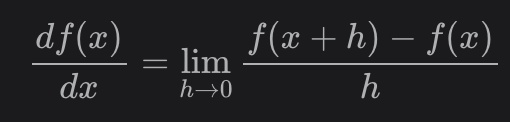

In [12]:
# 나쁜 구현 예
def numerical_diff(f,x):
    h = 1e-50
    return (f(x+h) - f(x)) / h

# 첫번째 문제
# 반올림오차 / 작은 값이 생략되어 최종 계산 결과에 오차가 생기게한다.

np.float32(1e-50)

# 두번째 문제
# f의 차분
# 진정한 미분은 x 위치의 함수의 기울기
# h를 무한이 0으로 좁히는 것이 불가능해 생기는 한계
# 오차를 줄이기위해 -> (x+h) - (x-h)는 중심/중앙 차분
# (x+h)와 (x)의 차분은 전방차분이라고 한다.

np.float32(0.0)

In [13]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

수치 미분의 예

* 해당 식에서 x가 5일 때와 10일 때의 미분 결과는 각각 0.2, 0.3 정도

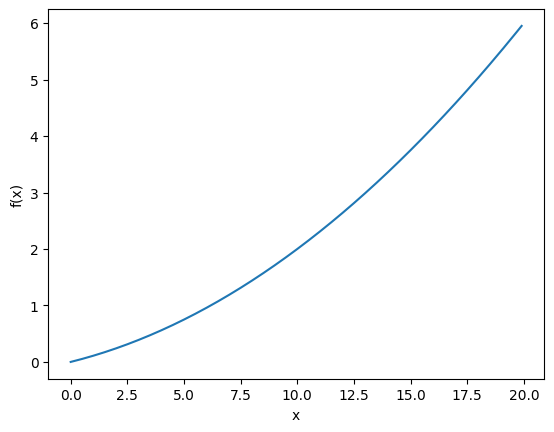

In [14]:
import matplotlib.pylab as plt

def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만듦
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [15]:
numerical_diff(function_1, 5)  # 0.1999999999990898
numerical_diff(function_1, 10) # 0.2999999999986347

0.2999999999986347

편미분

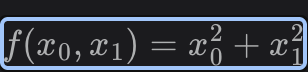

* 이 식을 미분하려고 할때, 주의해야 하는 것은 변수가 2개이므로, 어느 변수에 대한 미분인지가 중요
* 이처럼 변수가 여럿인 함수에 대한 미분을 편미분이라고 정의
* 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구하는 것
* 단, 여러 변수들 중에서 목표 변수 하나에 초점을 맞추고, 다른 변수는 값을 고정함

In [16]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

In [17]:
# 문제1
def function_tmp1(x0):
    return x0 * x0 + 4.0**2.0

numerical_diff(function_tmp1,3.0)

6.00000000000378

In [18]:
# 문제2
def function_tmp2(x1):
    return x1 * x1 + 3.0**2.0

numerical_diff(function_tmp2,4.0)

7.999999999999119

# 기울기 (Gradient)


* 모든 변수의 편미분을 벡터로 정리한 것
아래 그림은
* x0**2 + x1**2의 기울기를 나타내는 그림
* 아래 그림에서 확인할 수 있듯, 기울기는 함수의 가장 낮은 장소 (최솟값)를 가리키는 것 같은 모양
* 가장 낮은 곳에서 멀어질수록 화살표의 크기가 커짐
* 하지만 정확하게 말한다면, 기울기는 각 지점에서 낮아지는 방향을 가리킴

  * 즉, 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향
  * Global Optima, Local Optima 개념 참고

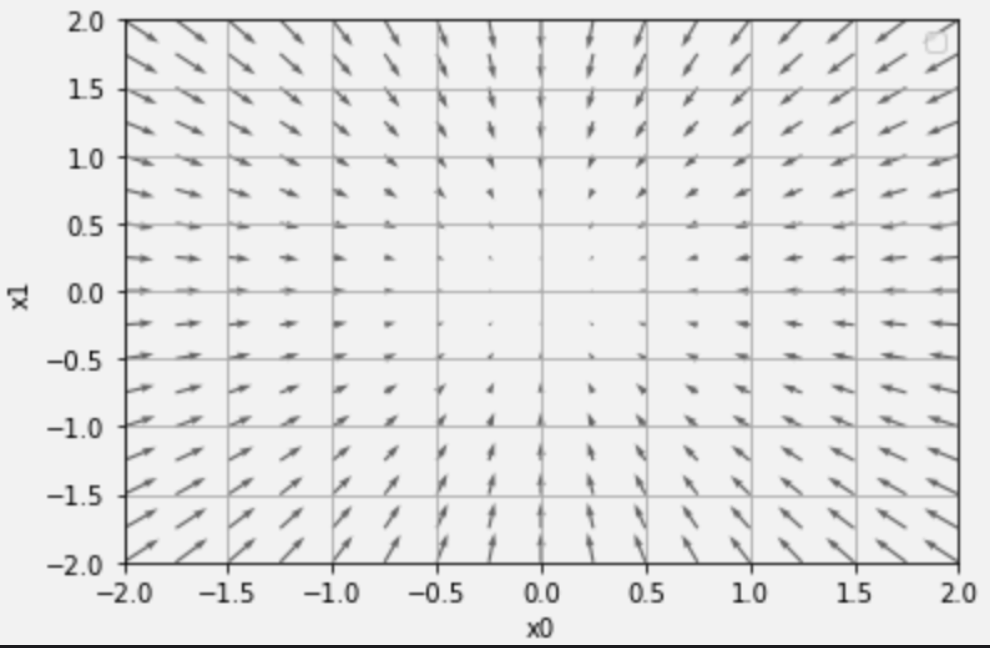

In [19]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001 아주 조금씩 변화시킴
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size): # idx는 “지금 미분 중인 변수 번호”
        tmp_val = x[idx] # x의 현재 값을 잠시 저장

        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x - h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    return grad

print(numerical_gradient(function_2, np.array([3.0, 4.0]))) # array([6., 8.])
print(numerical_gradient(function_2, np.array([0.0, 2.0]))) # array([0., 4.])
print(numerical_gradient(function_2, np.array([3.0, 0.0]))) # array([6., 0.])


[6. 8.]
[0. 4.]
[6. 0.]


#  경사법 (경사 하강법)


* 기계학습에서는 학습 단계에서 최적의 매개변수 (가중치와 편향)를 학습에서 찾음
* 최적이라는 것은 손실함수가 최솟값이 될 때의 매개변수 값
* 하지만 손실함수는 복잡하기 때문에, 어디가 최솟값인지 찾기 힘듦
* 따라서 기울기를 잘 이용하여 함수의 (가능한 최대한 작은) 최솟값을 찾으려는 것이 경사법의 개념
* 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기
  * 하지만 기울기가 가리키는 곳에 함수의 최솟값이 있는지 보장할 수는 없음
  * 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없을 수도 있음

* 그렇기 때문에 기울기 정보를 단서로 하여 나아갈 방향을 정하는 경사법 개념이 도입
* 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한 후, 이동한 곳에서 기울기를 구하고, 이 과정을 반복
* 이렇게 함수의 값을 점차 줄이는 것이 경사법 (Gradient method)이고, 기계학습을 최적화 하는데 사용

  * 경사법에서 최솟값을 찾는 과정을 경사 하강법 (Gradient descent method)
  * 경사법에서 최댓값을 찾는 과정을 경사 상승법 (Gradient ascent method)

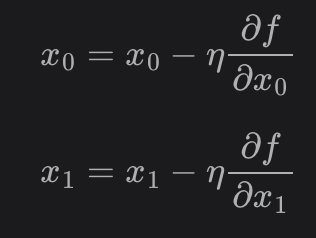

* 경사법을 수식으로 표현하면 위와 같음
* n는 갱신하는 양을 나타내고, 신경망 학습에서는 학습률 (Learning rate)이라고 정의
* 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하는지를 정하는 것
* 일반적으로 학습률은 0.01, 0.001 등의 값으로 정하는데, 이 값이 너무 크거나 작으면 좋은 장소로 찾아가기 힘듦
* 학습률과 같은 매개변수를 하이퍼파라미터 (Hyper parameter)라고 정의
  * 신경망의 가중치 매개변수는 훈련 데이터와 알고리즘으로 자동으로 획득되는 매개변수
  * 하지만 학습률 같은 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변수

In [20]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad

    return x

# 인수 f는 최적화하려는 함수,
# init_x는 초깃값,
# lr은 learning rate를 의미하는 학습률,
# step_num은 경사법에 따른 반복횟수

In [21]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)   # array([-6.11110793e-10,  8.14814391e-10])

array([-6.11110793e-10,  8.14814391e-10])

In [22]:
# 학습률이 너무 큰 예 : lr = 10.0
init_x = np.array([-3.0, 4.0])
a = gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)
print(a)

[-2.58983747e+13 -1.29524862e+12]


In [23]:
# 학습률이 너무 작은 예 : lr = 1e-10
init_x = np.array([-3.0, 4.0])
b = gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100) # array([-2.99999994,  3.99999992])
print(b)

[-2.99999994  3.99999992]


신경망에서의 기울기


* 기울기는 가중치 매개변수에 대한 손실 함수의 기울기

In [24]:
def softmax(x):
    x = x - np.max(x)  # overflow 방지
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)

def cross_entropy_error(y, t):
    # y: (C,) 확률, t: (C,) one-hot 또는 정답 인덱스
    if y.ndim == 1:
        y = y.reshape(1, -1)
    if t.ndim == 1:
        t = t.reshape(1, -1)

    # t가 one-hot이면 정답 인덱스로 변환
    if t.size == y.size:
        t = np.argmax(t, axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

class simpleNet: # x = 입력 데이터, t = 정답 레이블
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [25]:
net = simpleNet()
print(net.W) # 가중치 매개변수


[[-0.01381307 -0.41997423 -1.33029082]
 [-1.0013056  -0.22094494  0.0066793 ]]


In [26]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
np.argmax(p) # 최댓값의 인덱스

[-0.90946288 -0.45083498 -0.79216312]


np.int64(1)

In [27]:
t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x, t)

np.float64(1.1927497456512648)

In [28]:
def numerical_gradient(f, x): # 다차원
    h = 1e-4
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index          # 예: (0,0), (0,1), ..., (1,2)
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

        it.iternext()

    return grad


In [29]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.16188391  0.25608448 -0.41796839]
 [ 0.24282587  0.38412672 -0.62695259]]


학습 알고리즘 구현하기


* 전제: 신경망에는 적용 가능한 가중치와 편향이 있음. 이 값들을 훈련 데이터에 적응하도록 조정하는 것을 학습이라고 정의
* 1단계: 미니배치
  * 훈련 데이터 중 일부를 무작위로 가져오기
  * 선별한 데이터를 미니배치라고 하고, 그 미니배치의 손실함수 값을 줄이는 것이 목표
* 2단계: 기울기 산출
  * 미니배치의 손실함수 값을 줄이기 위해 각 가중치 매개변수의 기울기 구하기
  * 기울기는 손실함수의 값을 가장 작게 하는 방향 제시
* 3단계: 매개변수 갱신
  * 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
* 4단계: 1~3단계를 반복

* 이 과정이 신경망 학습이 이뤄지는 순서. 경사하강법으로 매개변수를 갱신하는 방법
* 이때 데이터를 미니배치로 무작위로 선정하므로, 확률적 경사 하강법 (Stochastic gradient descent, SGD)로 정의

2층 신경망 클래스 구현하기

In [44]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [75]:
import sys, os
sys.path.append(os.pardir)

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

        # x = 입력 데이터, t = 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

        # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads


In [76]:
# params 변수에는 이 신경망에 필요한 매개변수가 모두 저장된다.
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape # (784, 100)
net.params['b1'].shape # (100, )
net.params['W2'].shape # (100, 10)
net.params['b2'].shape # (10, )

(10,)

In [77]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
y = net.predict(x)

In [78]:
# grads 변수에는 params 변수에 대응하는 각 매개변수의 기울기가 저장된다.
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10) # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x,t) # 기울기 계산


In [79]:
grads['W1'].shape #(784, 100)
grads['b1'].shape #(100,)
grads['W2'].shape #(100, 10)
grads['b2'].shape #(10,)

(10,)

* 초기화 매서드에서 가중치 매개변수도 초기화한다
* 가중치 매개변수의 초깃값을 무엇으로 서정하냐가 신경망 학습의 성공을 좌우한다.
* 당장은 정규분포를 따르는 난수로, 편향은 0으로 초기화한다고 이야기한다.

* numerical_gradient(self.x, t) 는 수치미분방식이 사용되었다.
* 더 빠르게 수행하는 기법은 오차역전파법이다.
* 시간을 절약하기위해선 다음장에 배우는 gradient(self.x, t)를 사용한다.

미니 배치 학습 구현하기

* 미니배치 학습: 훈련 데이터 중 일부를 무작위로 꺼내고 (미니배치), 그 미니배치에 대해 경사법으로 매개변수를 갱신
* 아래 예시에서는 미니배치 크기를 100으로 설정
* 60,000개의 훈련 데이터에서 임의로 100개 데이터를 추리고, 이 데이터로 확률적 경사하강법으로 매개변수를 갱신
* 갱신 횟수 (반복 횟수)는 10,000번으로 설정하고, 갱신 할때마다 계산되는 손실 함수 값을 배열에 추가
* 결과를 보면, 학습 횟수가 늘어날수록 손실 함수의 값이 줄어드는 것을 알 수 있음
* 이 결과는 신경망의 가중치 매개변수가 서서히 데이터에 적응하면서 학습되고 있다는 것을 뜻함


In [71]:
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape(-1, 784)
x_test  = x_test.reshape(-1, 784)

train_loss_list = []

# 하이퍼파라미터

iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능개선버전 - 오차역전파 / 구현은 다음장

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

        # 학습 경과 기록
        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)


/tmp/ipython-input-1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipython-input-1518476301.py:2: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x)  # overflow 방지


시험 데이터로 평가하기

 * 앞서 훈련된 모델은 훈련 데이터에 대한 결과이므로, 다른 데이터셋에서도 동작하는지 확인이 필요함
* 즉, 훈련 데이터에서만 학습한 결과인 오버피팅 되었는지를 확인해봐야 함
* 신경망 학습의 목표는 범용적인 능력을 익히는 것이다.
* 학습 도중 정기적으로 훈련 데이터와 시험 데이터를 대상으로 정확도를 기록한다.
* 여기서는 1에폭별로 훈련데이터와 시험 데이터에 대한 정확도를 기록한다.
  * 에폭은 하나의 단위이고, 1에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당한다.
  * 훈련데이터 10000개를 100개의 미니 배치로 학습할 경우, 확률적 경사 하강법을 100회 반복하면 모든 훈련 데이터를 소진한 것이다. -> 1에폭 = 100회

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape(-1, 784)
x_test  = x_test.reshape(-1, 784)

# 하이퍼파라미터

iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복수
iter_per_epoch = max(train_size / batch_size, 1)


for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능개선버전 - 오차역전파 / 구현은 다음장

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

        # 학습 경과 기록
        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)

        # 1 에폭 당 정확도 계산
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            test_acc = network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print("train acc, test acc: " + str(train_acc) + ', ' + str(test_acc))


* 두선이 거의 겹쳐져있다.(정확도에는 차이가 없다.) -> 오버피팅이 일어나지않았다.

* 오버피팅이 일어나면 어느순간부터 시험데이터의 정확도가 떨어진다.
* 오버피팅을 잡을 대표적으로는 가중치 감소, 드롭아웃과 같은 기법이있다.

정리

* 손실함수를 기준으로 그 값이 가장 작아지는 가중치 매개변수를 찾아내는 것이 신경망 학습의 목표
* 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용
* 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가
* 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치 값을 갱신 반복
* 수치미분을 이용해 가중치 매개변수의 기울기를 구할 수 있고, 아주 작은 값이 주어졌을때 차분으로 미분한다.
* 수치미분을 이용하는 계산은 구현은 간단하지만 시간이 오래걸린다.